# Data Pre-Processing Steps
`Data Understanding >> Check Datatypes >> Handle Null Values >> Remove Duplicates >> Visualization >> Data Splitting >> Normalization >> Encoding`

---

## Visualization
---

In [4]:
# import neccessary libraries

import pandas as pd # for data manipulation
import numpy as np # for numerical operations

import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for advanced data visualization

In [5]:
# read data
data = pd.read_csv(r"D:\Courses\DEPI R4 - Microsoft ML\Technical\Datasets\Data Analysis\Titanic_Cleaned.csv")

# display data
display(data)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,65.6563,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
884,2,male,27.0,0,0,13.0000,S,0
885,1,female,19.0,0,0,30.0000,S,1
886,3,female,28.0,1,2,23.4500,S,0
887,1,male,26.0,0,0,30.0000,C,1


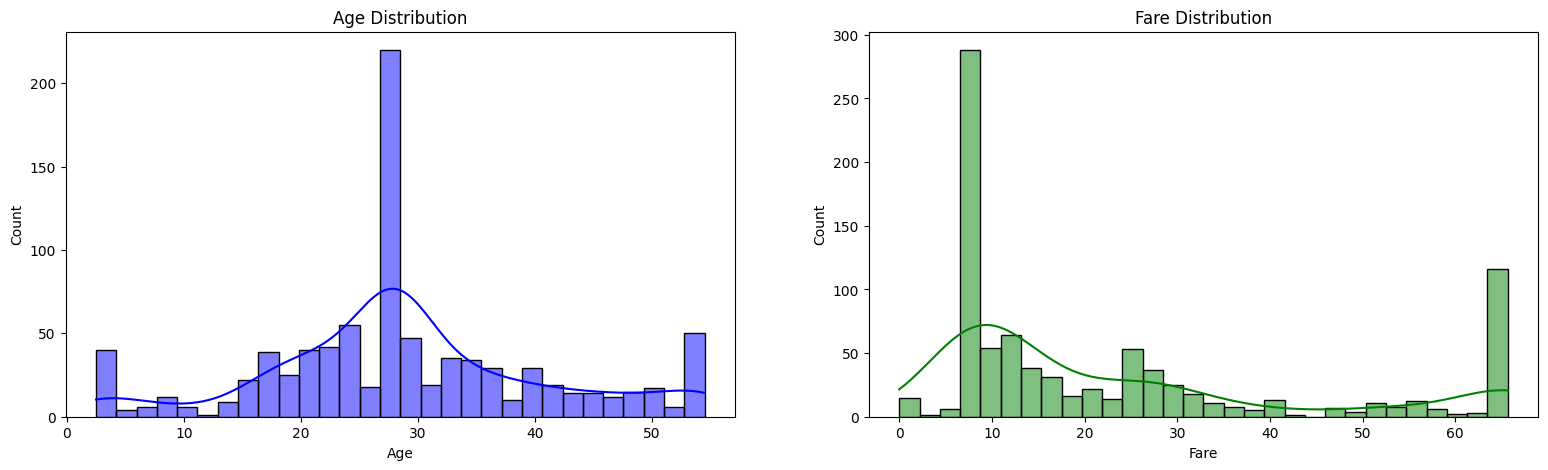

In [6]:
# histogram of Age and fare (distribution of numerical variables)
plt.figure(figsize=(19, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.subplot(1, 2, 2)
sns.histplot(data['Fare'], bins=30, kde=True, color='green')
plt.title('Fare Distribution')
plt.show()

In [7]:
# countplot of Survived (categorical variable)

cat_cols = data.select_dtypes(include=["category", "object", "string"]).columns

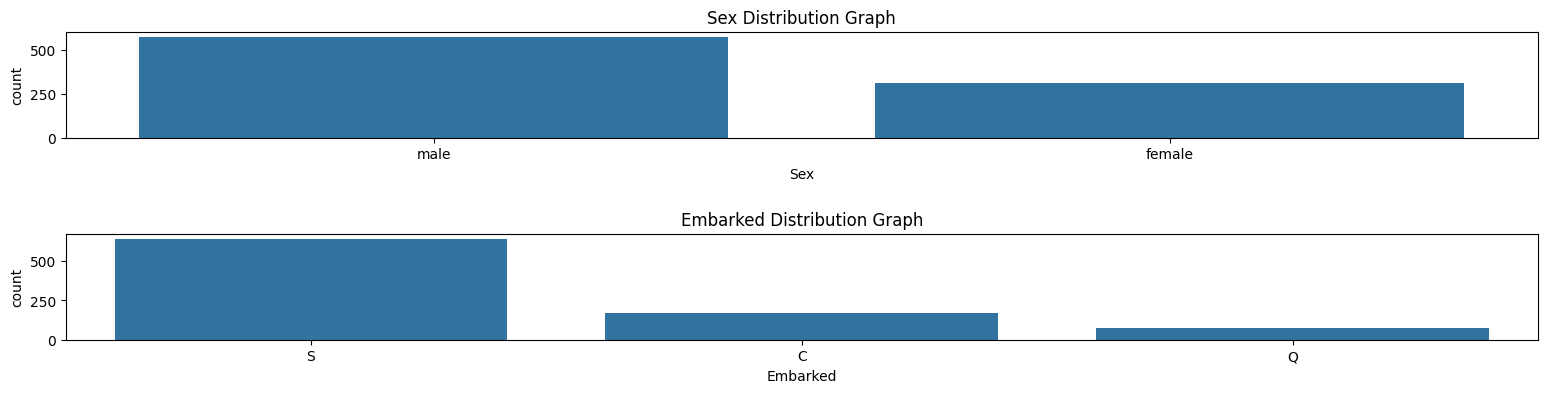

In [8]:
# countplot for each categorical variable

plt.figure(figsize=(19, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 1, i+1)
    sns.countplot(x=col, data=data)
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=0.9, wspace=0.3)
plt.show()

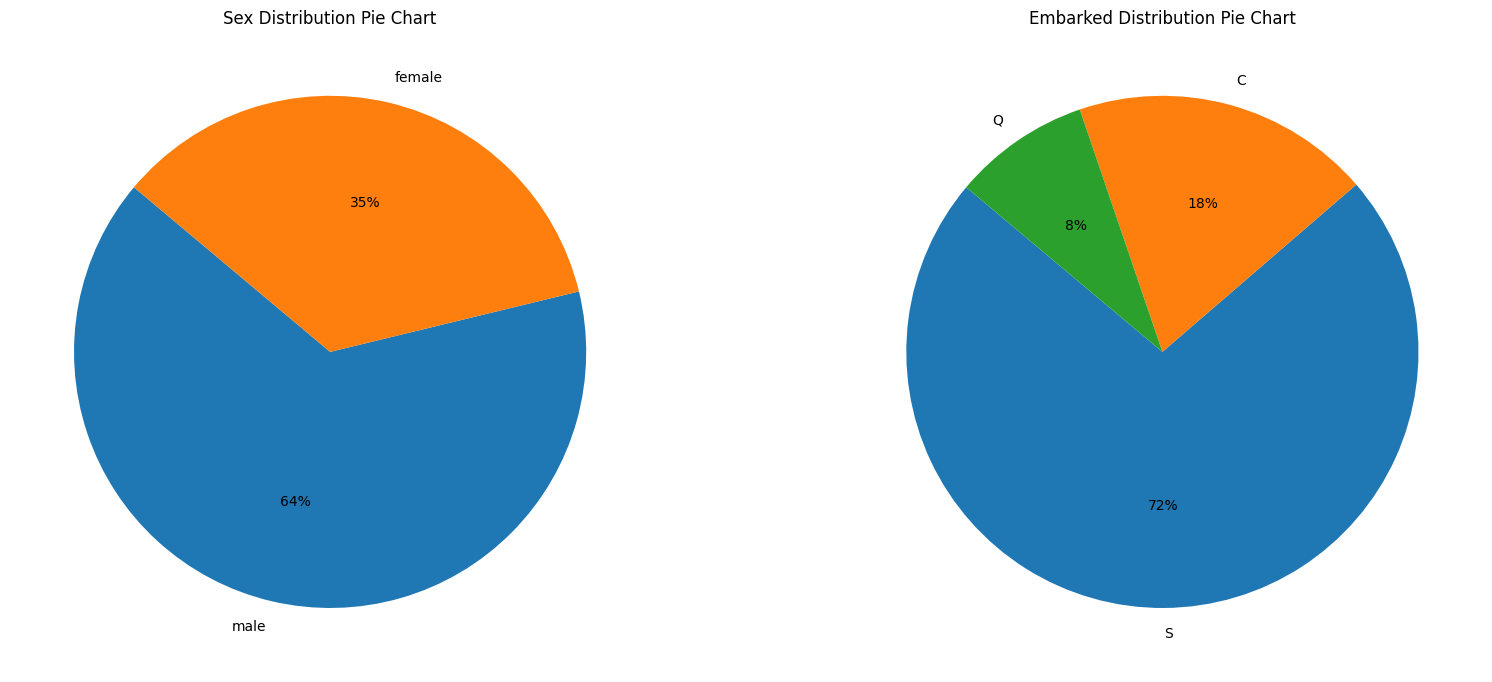

In [9]:
# pie chart of Survived
plt.figure(figsize=(19, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 2, i+1)
    unique = data[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels=categories, startangle=140, autopct='%1.1d%%')
    plt.title(f"{col} Distribution Pie Chart")
plt.subplots_adjust(hspace=0.9, wspace=0.3)
plt.show()
    

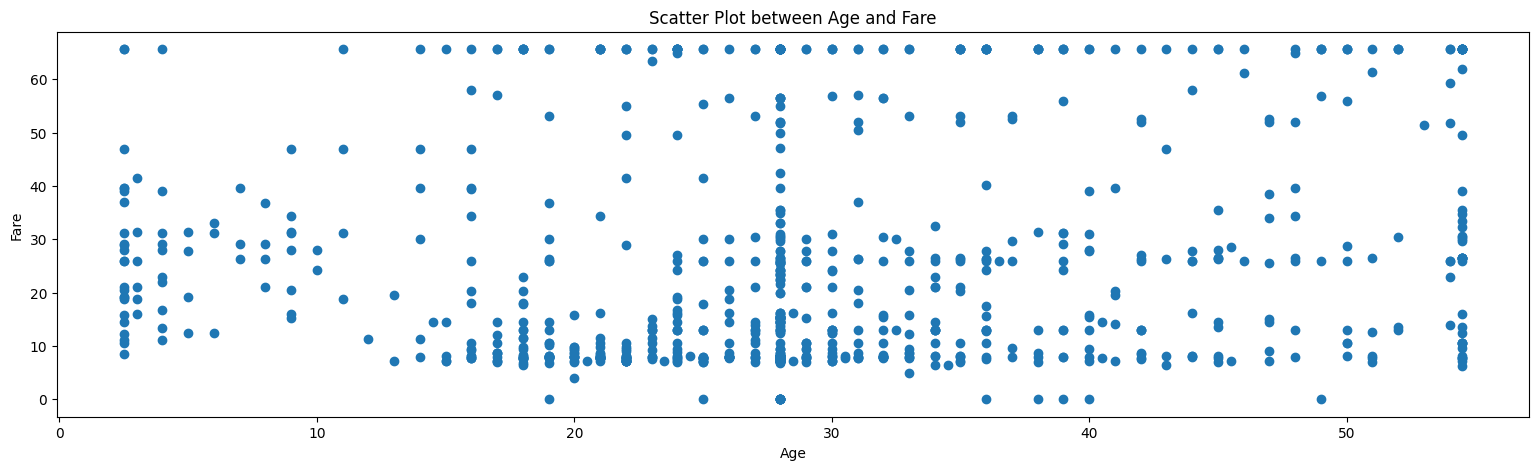

In [10]:
# scatter plot (numerical vs numerical variable)
plt.figure(figsize=(19, 5))
plt.scatter(data["Age"], data['Fare']) # no correlation
plt.title("Scatter Plot between Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

In [11]:
# get value of correlation between Age and Fare as well as correlation matrix
corr_mat = data[['Age', 'Fare']].corr()

# get value of correlation between Age and Fare as value
corr_val = data['Age'].corr(data['Fare'])

display(corr_mat)
print("Correlation between Age and Fare:", corr_val)

,Age,Fare
Age,1.000000,0.139065
Fare,0.139065,1.000000


Correlation between Age and Fare: 0.1390648825274784


In [12]:
agg = data.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc=len)
display(agg)

Sex,female,male
Survived,,
0,81,468
1,231,109


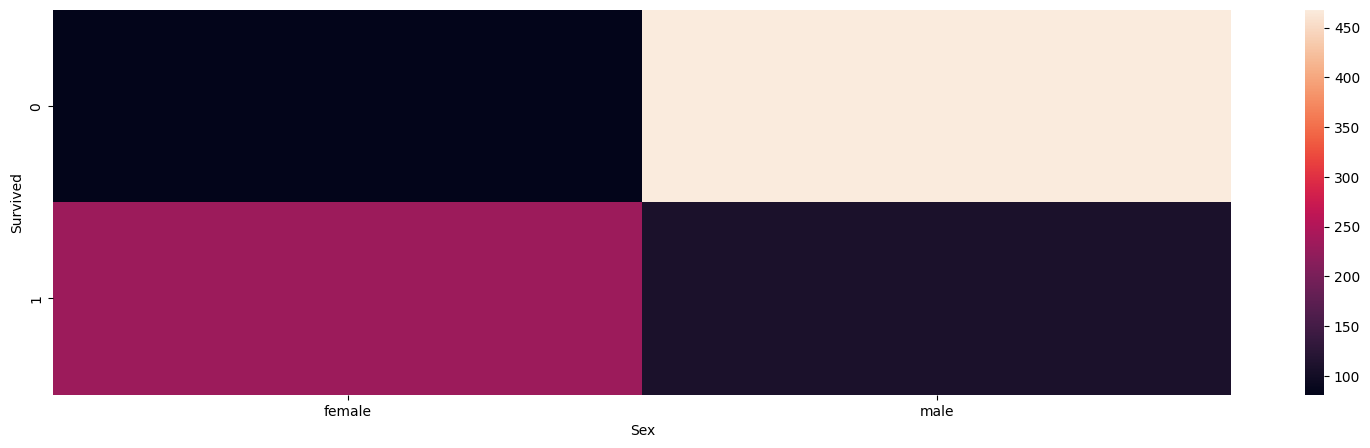

In [13]:
# heatmap (categorical vs categorical variable)

plt.figure(figsize=(19, 5))
agg = data.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc=len)
sns.heatmap(agg)
plt.show()

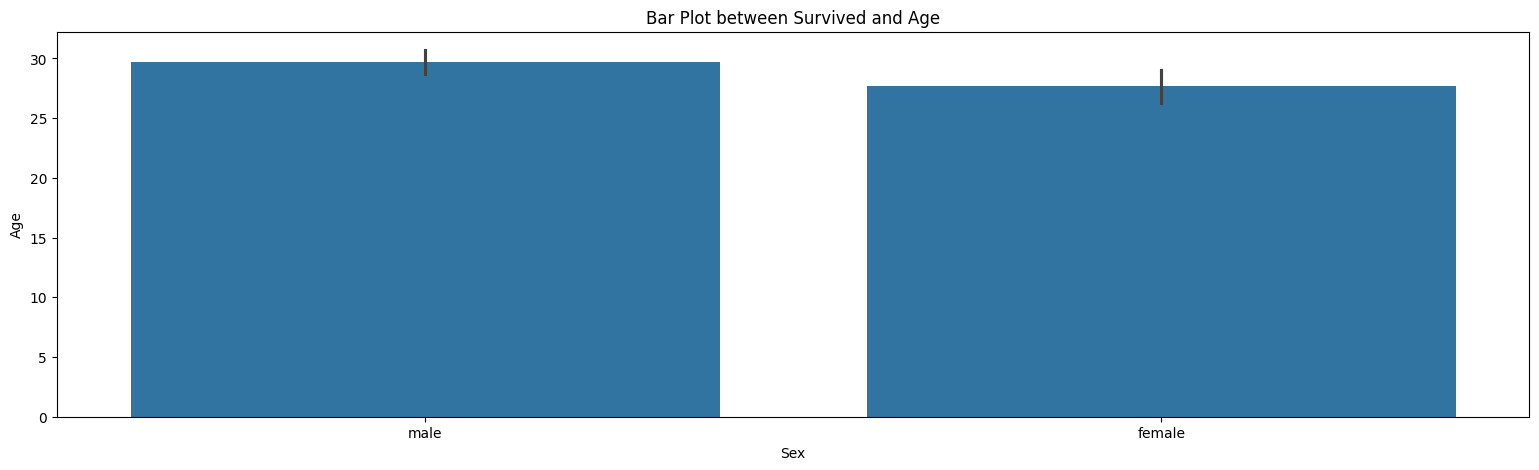

In [14]:
# bar plot (categorical vs numerical variable)

plt.figure(figsize=(19, 5))
sns.barplot(x="Sex", y="Age", data=data)
plt.title("Bar Plot between Survived and Age")
plt.show()

## Data Splitting
---

In [21]:
# separate features and target variable

X = data.drop("Survived", axis=1) # using iloc[:, data.columns != "Survived"] or iloc[:, :-1]

Y = data["Survived"] # using iloc[:, data.columns == "Survived"] or iloc[:, -1]

# show features and target variable
display(X)

display(Y)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
884,2,male,27.0,0,0,13.0000,S
885,1,female,19.0,0,0,30.0000,S
886,3,female,28.0,1,2,23.4500,S
887,1,male,26.0,0,0,30.0000,C


0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

## Normalization
---

In [16]:
# for install
# %pip install scikit-learn

In [ ]:
# normalization : increases the model performance (speed and accuracy) - uniform distribution of data


# min-max normalization -> (x - min) / (max - min)

# standardization -> (x - mean) / std

# robust scaling -> (x - median) / IQR

# max abs scaling -> x / max(abs(x))

In [25]:
# min-max normalization -> (x - min) / (max - min)

from sklearn.preprocessing import MinMaxScaler

num_cols = X.select_dtypes("number").columns

scaler = MinMaxScaler()

scaler.fit(X[num_cols])

X[num_cols] = scaler.transform(X[num_cols])

X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.375000,0.125,0.000000,0.110424,S
1,0.0,female,0.682692,0.125,0.000000,1.000000,C
2,1.0,female,0.451923,0.000,0.000000,0.120704,S
3,0.0,female,0.625000,0.125,0.000000,0.808757,S
4,1.0,male,0.625000,0.000,0.000000,0.122608,S
...,...,...,...,...,...,...,...
884,0.5,male,0.471154,0.000,0.000000,0.198001,S
885,0.0,female,0.317308,0.000,0.000000,0.456925,S
886,1.0,female,0.490385,0.125,0.333333,0.357163,S
887,0.0,male,0.451923,0.000,0.000000,0.456925,C


## Encoding
---

In [ ]:
# for install
#%pip install category_encoders

In [ ]:
# ordinal: categories with a natural order (e.g., education level: high school < bachelor's < master's < doctorate)

# nominal: categories without a natural order (e.g., colors: red, blue, green)


# one-hot encoding: converting categorical variables into binary vectors

# binary encoding: converting categories into binary numbers

# ordinal encoding: assigning integer values to categories based on order

# target encoding: replacing categories with the mean of the target variable for that category

In [29]:
# one-hot encoding: converting categorical variables into binary vectors

from category_encoders import OneHotEncoder

str_cols = ["Sex", "Embarked"]

encoder = OneHotEncoder(cols=str_cols, use_cat_names=True, drop_invariant=True)

X = encoder.fit_transform(X)

X

,Pclass,Sex_male,Sex_female,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,1.0,1,0,0.375000,0.125,0.000000,0.110424,1,0,0
1,0.0,0,1,0.682692,0.125,0.000000,1.000000,0,1,0
2,1.0,0,1,0.451923,0.000,0.000000,0.120704,1,0,0
3,0.0,0,1,0.625000,0.125,0.000000,0.808757,1,0,0
4,1.0,1,0,0.625000,0.000,0.000000,0.122608,1,0,0
...,...,...,...,...,...,...,...,...,...,...
884,0.5,1,0,0.471154,0.000,0.000000,0.198001,1,0,0
885,0.0,0,1,0.317308,0.000,0.000000,0.456925,1,0,0
886,1.0,0,1,0.490385,0.125,0.333333,0.357163,1,0,0
887,0.0,1,0,0.451923,0.000,0.000000,0.456925,0,1,0
